In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
print("California Housing data loaded using fetch_california_housing.")

if X.isnull().sum().any():
        # Only calculate median for numeric columns to avoid TypeError on 'ocean_proximity'
        X = X.fillna(X.median(numeric_only=True))

print("California Housing data loaded from alternative URL.")


California Housing data loaded using fetch_california_housing.
California Housing data loaded from alternative URL.


In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
# Perform one-hot encoding on the 'ocean_proximity' column


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
#Model Declaration
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [9]:
pred = gbr.predict(X_test)

In [11]:
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

mse, r2

(0.2939973248643864, 0.7756446042829697)

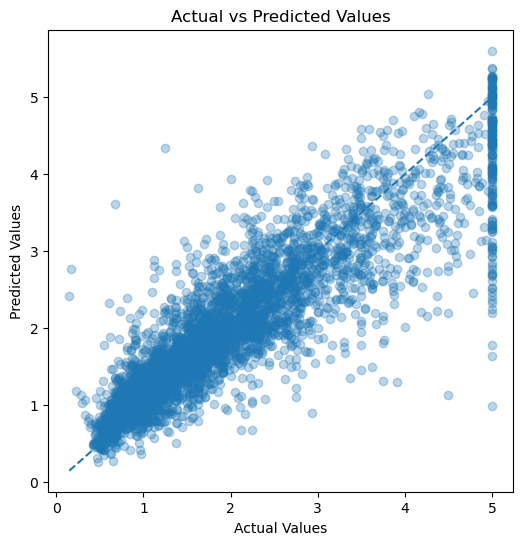

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [13]:
#Effect of Learning Rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.8]
results = []

for lr in learning_rates:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=lr,
      max_depth = 3,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((lr, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Learning Rate", "R2 Score"])

,Learning Rate,R2 Score
0,0.01,0.493068
1,0.05,0.742843
2,0.10,0.775645
3,0.20,0.798105
4,0.80,0.805044


In [14]:
#Effect of Tree Depth
depths = [1,2,3,4,7]
results = []

for depth in depths:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=0.1,
      max_depth = depth,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((depth, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Max_Depth", "R2 Score"])

,Max_Depth,R2 Score
0,1,0.626627
1,2,0.736878
2,3,0.775645
3,4,0.801975
4,7,0.834076


In [15]:
feature_importance = gbr.feature_importances_

importance_df = pd.Series(
    feature_importance, index=X.columns
).sort_values(ascending=False)

importance_df.head(10)

MedInc        0.604259
AveOccup      0.122835
Longitude     0.109853
Latitude      0.098533
HouseAge      0.034113
AveRooms      0.023948
AveBedrms     0.005106
Population    0.001354
dtype: float64